# How To Create a Movie Recommender System using Matrix Factorization

## Table of Contents

1. [Abstract](#chapter1)<br><br>
2. [Learning Objectives](#chapter2)<br><br>
3. [Machine Learning Pipelines](#chapter3)<br><br>
4. [Development Work](#chapter4)<br>
    4.1 [Importing Libraries](#section_4_1)<br>
    4.2 [Data Preparation and Preprocessing](#section_4_2)<br>
    4.3 [Dataset and Dataloader Definitions](#section_4_3)<br>
    4.4 [Model Definition](#section_4_4)<br>
    4.5 [Training and Evaluation](#section_4_5)<br>
        &nbsp;&nbsp;&nbsp;&nbsp;4.5.1 [Hyperparameters](#sub_section_4_5_1)<br>
    4.6 [Result Generation and Analysis](#section_4_6)<br>
        &nbsp;&nbsp;&nbsp;&nbsp;4.6.1 [Result Comparison](#sub_section_4_6_1)<br><br>
5. [Tutorials on Other Recommender Systems](#chapter5)<br><br>
6. [References](#chapter6)<br>

## Abstract <a id="chapter1"></a>

The aim of this project is to develop a Machine Learning Pipeline for a Movie Recommender System by leveraging Matrix Factorization, which is a Collaborative Filtering technique commonly utilized among various recommender systems. Through the application of PyTorch, the built model extracts hidden factors from user-movie interactions to make predictions based on user preference. The model is built and trained on the MovieLens dataset, employing techniques such as weight decay and a custom loss function to increase generability. Once trained, the model's robustness is affirmed through the graphical representation of its training and validation loss. Finally, the system's efficacy is exhibited via its ability to suggest tailored movie recommendations.

## Learning Objectives <a id="chapter2"></a>

The general objective of this tutorial is to gain an understanding of the development process of a machine learning pipeline, particularly within the context of a recommendation system, done using PyTorch.

The more specific objectives in terms of this project, are to gain a further understanding on the following, 

#### Data Preparation and Preprocessing
- Learn how datasets are loaded and merged from different sources (a CSV file in the case of this project).
- Grasp the importance of splitting a dataset into training, validation and testing sets for model evaluation.
#### Using defined Datasets and Dataloaders
- Understand how to define a custom Dataset and Dataloader class using PyTorch.
#### Model Architecture and Implementation
- Understand the definition of a neural network architecture using PyTorch, with a special focus on embedding layers for a collaborative filtering model.
#### Training and Evaluating a Created Model
- Implementing a functional training loop, which includes a forward pass, custom loss computation, back propagation, and updation of parameters.
- Computing training and validation loss values during each epoch.
#### Generating Recommendations Based on Model-made Predictions
- Applying the trained model to generate recommendations for users.
#### Application and Analysis of the Model on Unseen Data
- Evaluating the model's performance through application on the test set (unseen data).
- Learn how to save and load model state to save time spent on model training.
#### Learn Additional Skills
- A gained familiarity with operations in PyTorch, pandas and numpy, among other libraries.

## Machine Learning Pipelines <a id="chapter3"></a>

A machine learning pipeline offers a means to codify and automate the necessary workflow to produce a machine learning model *(Valohai, n.d)*. This project will delve into the process of creating a machine learning pipeline for a movie recommendation system, which is a common example of a recommender system.

Creating a generic ML pipeline involves the following steps,
1. Data Preparation and Preprocessing
2. Data Cleaning (and Feature Engineering)
2. Model Selection and Definition
3. Model Training and Evaluation
4. Result Generation and Analysis

In the rest of this tutorial, we will be going over the aforementioned steps for the creation of a movie recommender system.

## Development Work <a id="chapter4"></a>

Now, we shall begin on the necessary development work for the aforementioned steps. The code discussed henceforth has been written with guidance from the [PyTorch](https://pytorch.org/docs/stable/index.html) *(PyTorch, 2019)*, [Scikit Learn](https://scikit-learn.org/stable/) *(scikit-learn, 2019)* and [Matplotlib](https://matplotlib.org/) *(Matplotlib, 2012)* documentation.

### Importing Libraries <a id="section_4_1"></a>

The libraries/frameworks utilized for this project are as follows (refer to the links for installation instructions),

1. [scikit-learn](https://scikit-learn.org/stable/install.html)
2. [PyTorch](https://pytorch.org/)
3. [NumPy](https://numpy.org/install/)
4. [Pandas](https://pandas.pydata.org/docs/getting_started/install.html)
5. [Matplotlib](https://matplotlib.org/stable/users/installing/index.html)
6. os

In [1]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.nn as nn
import pandas as pd
import numpy as np
import torch
import os

### Data Preparation and Preprocessing <a id="section_4_2"></a>

Data lays the foundation to any machine learning model. At this stage of the pipeline development, raw data is collected, cleaned and transformed into a format that is suitable for machine learning algorithms to learn from. The main goal is to create a dataset that is clean, comprehensive and accurately rerpresents the problem space the model is intended to address *(Xenonstack, 2020)*.

For this project, the dataset being used is the **MovieLens 20M Dataset** *(Kaggle, n.d.)*. This dataset is already clean and therefore does not require further manipulation.

The CSV files being used are listed below (along with their columns),
1. **rating.csv**
    - userId
    - movieId
    - rating
    - timestamp
2. **movie.csv**
    - movieId
    - title
    - genre

<u>**Note:**</u> 
- The **'timestamp'** and **'genre'** columns from both the files are redundant for the purpose of this project, and are therefore not loaded into the dataframes.
- Only the first **200,000** records are loaded from 'rating.csv' (out of over a million) to greatly reduce the time taken to train and evaluate different model configurations. 

Through the code below, the data is loaded into separate variables where they are stored and used, as will be shown below.

In [2]:
# Loads data from 'rating.csv' using pandas and stores the dataframe in the 'ratings' variable 
ratings = pd.read_csv('rating.csv', usecols=['userId', 'movieId', 'rating'], nrows=200000)
# Displays the first 5 records of the dataframe
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [3]:
# Prints a concise summary of the 'ratings' dataframe
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   200000 non-null  int64  
 1   movieId  200000 non-null  int64  
 2   rating   200000 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 4.6 MB


In [4]:
# Loads data from 'movie.csv' using pandas and stores the dataframe in the 'movies_df' variable 
movies_df = pd.read_csv('movie.csv', usecols=['movieId', 'title'])
# Displays the first 5 records of the dataframe
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [5]:
# Prints a concise summary of the 'ratings' dataframe
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
dtypes: int64(1), object(1)
memory usage: 426.3+ KB


In [6]:
# Merges the above dataframes to include 'title' as a column
ratings_with_titles = pd.merge(ratings, movies_df, on='movieId', how='left')
ratings_with_titles.head()

,userId,movieId,rating,title
0,1,2,3.5,Jumanji (1995)
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p..."
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
3,1,47,3.5,Seven (a.k.a. Se7en) (1995)
4,1,50,3.5,The Usual Suspects (1995)


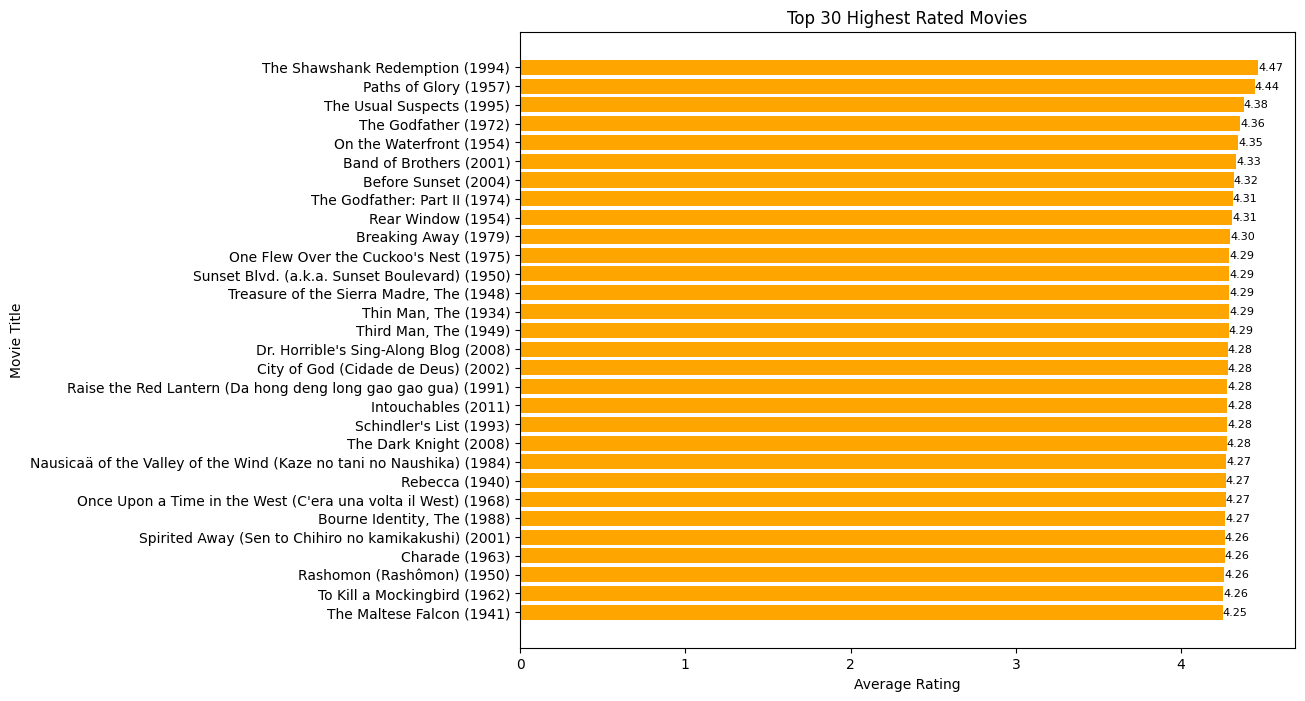

In [16]:
# Gathers average ratings for all movies in the dataset
average_ratings = ratings_with_titles.groupby('title').rating.agg(['mean', 'count'])

# Filters out movies that have less than 25 ratings
filtered_average_ratings = average_ratings[average_ratings['count'] > 25]
sorted_movies = filtered_average_ratings.sort_values(by='mean', ascending=False)

# Gets top 30 rated to be displayed on the graph
top_movies = sorted_movies.head(30)

# Plots a bar-graph for the 30 highest rated movies
plt.figure(figsize=(10, 8))
plt.barh(top_movies.index, top_movies['mean'], color='orange')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top 30 Highest Rated Movies')
plt.gca().invert_yaxis() 

# Annotate each bar with the value of the average rating
for index, value in enumerate(top_movies['mean']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=8, color='black')

plt.show()

In [20]:
# Uses NumPy to extract unique user and movie IDs for faster processing
user_ids = np.unique(ratings['userId'].values)
movie_ids = np.unique(ratings['movieId'].values)

# Creates a mapping from the (User and Movie) IDs to contiguous integers
user_to_index = {user_id: index for index, user_id in enumerate(user_ids)}
movie_to_index = {movie_id: index for index, movie_id in enumerate(movie_ids)}
ratings['userId'] = ratings['userId'].map(user_to_index)
ratings['movieId'] = ratings['movieId'].map(movie_to_index)

# Creates dictionary containing movies rated by all existing users
# (used later in the code to filter out movies)
user_rated_movies = ratings.groupby('userId')['movieId'].apply(set).to_dict()

The above step of creating a mapping is commonly used in the preprocessing of collaborative filtering models to facilitate easier indexing and efficiency in matrix operations.

In [9]:
# Splits loaded data into training, testing and validation sets
train_and_val, test = train_test_split(ratings, test_size=0.2, random_state=42)
train, val = train_test_split(train_and_val, test_size=0.2, random_state=42)

# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Dataset and Dataloader Definitions <a id="section_4_3"></a>

On completion of the preprocessing stage, the next step is to organize the data into batches that can be iterated over, during the training and evaluation of the model. Here, with the help of the PyTorch library we define a custom Dataset class to hold the data and a Dataloader class to handle the batching and shuffling of data. This structure allows for an efficient training strategy, especially when dealing with larger datasets.

In [10]:
# Defines a custom PyTorch Dataset based on the loaded dataset
class MovieDataset(Dataset):
    
    # Initializes the dataset with the 'ratings' dataframe
    def __init__(self, ratings):
        # The pandas series are converted to tensors via NumPy
        self.users = torch.from_numpy(ratings['userId'].values.astype(np.int64))
        self.movies = torch.from_numpy(ratings['movieId'].values.astype(np.int64))
        self.ratings = torch.from_numpy(ratings['rating'].values.astype(np.float32))

    # Fetches user ID, movie ID and rating for the specified index
    def __getitem__(self, index):
        return self.users[index], self.movies[index], self.ratings[index]

    # Returns total number of samples in the dataset
    def __len__(self):
        return len(self.ratings)

# Instantiates the datasets
train_dataset = MovieDataset(train)
test_dataset = MovieDataset(test)
val_dataset = MovieDataset(val)

# Creates the data loaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

### Model Defintion <a id="section_4_4"></a>

During the model definition, we select an algorithm that is suitable for the problem at hand, and define its structure. The type and structure of the algorithm could range from a simple linear regression model, to a complex deep neural network. This choice depends on the nature of the data, the problem space, and the computational resources that are available. 

For this project, a **matrix factorization** model is used, which is a common occurence in collaborative filtering models for recommender systems. The model learns embeddings for users and movies to make predictions on user ratings for unseen movies.

Matrix factorization is a method used to generate latent features when multiplying two different kinds of entities (users and movies in this case). Collaborative filtering is the application of matrix factorization to identify the relationship between users' and items' entities *(Chen, 2020)*. This <u>[article](https://towardsdatascience.com/recommendation-system-matrix-factorization-d61978660b4b)</u> provides a well-articulated explanation on the concept of matrix factorization as a whole.

A neural network framework is utilized in the code below to leverage the efficient handling of large scale matrix operations.

In [11]:
# Defines the Matrix Factorization model class, inheriting from the 'nn' module in PyTorch
class MFModel(nn.Module):
    def __init__(self, users_count, movies_count, embedding_dim=80):
        super(MFModel, self).__init__()
        
        # Create embeddings for users and movies
        # The IDs map to a vector of 'embedding_dim' size
        self.user_embeddings = nn.Embedding(users_count, embedding_dim)
        self.movie_embeddings = nn.Embedding(movies_count, embedding_dim)
        
        # Similarly creates embeddings for the user and movie biases
        # Each ID maps to a single bias value
        self.user_biases = nn.Embedding(users_count, 1)
        self.movie_biases = nn.Embedding(movies_count, 1)

    # Defines forward pass method for the model
    def forward(self, user_ids, movie_ids):
        
        # Retrieves the embeddings
        user_embedded = self.user_embeddings(user_ids)
        movie_embedded = self.movie_embeddings(movie_ids)
        
        # Retrieves and squeezes user bias 
        user_bias = self.user_biases(user_ids).squeeze()
        movie_bias = self.movie_biases(movie_ids).squeeze()
        
        # Computes the dot product between each user and the movie embedding
        interaction = (user_embedded * movie_embedded).sum(dim=1)

        # Applies sigmoid activation function to ensure the output is between 0 and 1
        output = torch.sigmoid(interaction + user_bias + movie_bias)
        
        # Scales the output from 0-1 to 0-5 to match the user ratings
        scaled_output = output * 5

        return scaled_output
    
    # Generates movie recommendations for a particular user
    def recommend_movies(self, user_id, recommendation_count=10):
            
            # Switches model to evaluation mode to make predictions
            self.eval()
            
            # Disables gradient computation
            with torch.no_grad():
                
                # Creates a tensor for the user ID
                user_tensor = torch.LongTensor([user_id])
                
                # Creates a tensor consisting of all the movie IDs
                all_movies = torch.arange(movies_count)
                
                # Ensure that both tensors created above are on the same device.
                user_tensor = user_tensor.to(next(self.parameters()).device)
                all_movies = all_movies.to(next(self.parameters()).device)

                # Filters out movies that the user has already rated
                if user_rated_movies is not None:
                    seen_movie_indices = torch.tensor([movie_to_index[movie_id] for movie_id in user_rated_movies[user_id] if movie_id in movie_to_index], dtype=torch.long)
                    unseen_mask = torch.ones(movies_count, dtype=torch.bool)
                    unseen_mask[seen_movie_indices] = False
                    all_movies = all_movies[unseen_mask]
                
                # Computes predicted ratings for all movies, by this user
                predictions = self.forward(user_tensor.expand_as(all_movies), all_movies)
                
                # Retrieves the top k predictions (sorted in descending order)
                scores, recommended_movie_indices = torch.topk(predictions, recommendation_count)
                
                # Convert indexed movie IDs back to original movie IDs.
                index_to_movie = {index: movie_id for movie_id, index in movie_to_index.items()}
                recommendations = [(index_to_movie[idx.item()], score.item()) for idx, score in zip(recommended_movie_indices, scores)]
                
            return recommendations

### Training and Evaluation <a id="section_4_5"></a>

Now that we have processed the data and defined a model, we move on to training the model. Here, the training data is fed into the model and the loss is computed based on the model's predictions.

Following the training, the evaluation phase tests the model on a separate validation and test set to assess how it performs on unseen data. This stage is iterative and therefore time-consuming, as the model goes over numerous cycles as its parameters are fine-tuned for optimal performance.

For this project, a custom loss function is used, which adds an additional penalty to predictions that are further away from expected values.

Having a custom loss function is generally advantageous as it leads to increased flexibility and improved performance *(Saturncloud.io, 2023)*.

In [12]:
# Function to calculate custom loss (Combination of MSE and an additional penalty for incorrect predictions)
def custom_loss(predictions, targets, penalty_threshold=2.0, penalty_weight=0.5):

    # Calculates mean squared error between predicted and expected values
    mse_loss = F.mse_loss(predictions, targets)

    # Calculate the absolute error
    abs_error = (predictions - targets).abs()

    # Identify whether the error exceeds the penalty threshold
    penalty_mask = abs_error > penalty_threshold

    # Calculate penalty component
    penalty = (abs_error[penalty_mask] - penalty_threshold).mean()

    # Combine MSE loss with penalty component
    combined_loss = mse_loss + penalty_weight * penalty

    return combined_loss if penalty_mask.any() else mse_loss

# Training Loop for the model
def train_model(model, epochs, train_loader, validation_loader, penalty_threshold=2.0, penalty_weight=0.5):
        
        # Sets the model to training mode
        model.train()
        
        # Defines lists to track for loss histories
        train_loss_history = []
        validation_loss_history = []
        
        # Loops over the dataset a number of times (decided by 'epochs' parameter)
        for epoch in range(epochs):
            total_loss = 0
            
            # Loops over all batches in the training dataloader
            for users, movies, ratings in train_loader:

                # Moves the defined tensors to the GPU
                users, movies, ratings = users.to(device), movies.to(device), ratings.to(device)
                
                # Zeroes paramter gradients to prevent accumulation from previous iterations
                optimizer.zero_grad()
                
                # Computes predicted ratings
                predicted_ratings = model(users, movies)
                
                # Calculates loss based on custom loss function
                loss = custom_loss(predicted_ratings, ratings, penalty_threshold, penalty_weight)
                
                # Computes loss gradient wrt model parameters
                loss.backward()
                
                # Performs a single optimization step
                optimizer.step()
                
                # Aggregates the training loss
                total_loss += loss.item()
            avg_training_loss = total_loss / len(train_loader)
 
            # Appends average loss for the epoch to the previously defined list
            train_loss_history.append(avg_training_loss)
        
            # Validation phase
            model.eval()
            total_validation_loss = 0
            
            # Disables gradient calculation
            with torch.no_grad():
                
                # Loops over all batches in the validation dataloader
                for users, movies, ratings in validation_loader:

                    # Moves the defined tensors to the GPU
                    users, movies, ratings = users.to(device), movies.to(device), ratings.to(device)
                    
                    # Computes predictions on the validation data
                    predicted_ratings = model(users, movies)
                    
                    # Calculates loss based on custom loss function
                    loss = custom_loss(predicted_ratings, ratings, penalty_threshold, penalty_weight)
                    
                    # Aggregates the validation loss
                    total_validation_loss += loss.item()
            avg_validation_loss = total_validation_loss / len(validation_loader)
            
            # Appends average loss for the epoch to the previously defined list
            validation_loss_history.append(avg_validation_loss)

            # Displays average training and validation loss for the epoch
            print(f'Epoch {epoch+1}/{epochs} Training Loss: {round(avg_training_loss, 3)} Validation Loss: {round(avg_validation_loss, 3)}')

        # On training completion, the models state is saved for future use/evaluation
        # This saves a large amount of time otherwise taken for training
        torch.save(model.state_dict(), 'mf_model.pth')
        
        return train_loss_history, validation_loss_history

# Evaluation loop to analyze model performance
def evaluate_model(model, test_loader):
    
    # Sets model to evaluation mode
    model.eval()
    total_loss = 0
    
    # Disables gradient computation since it is not needed for evaluation
    with torch.no_grad():
        
        # Loops over batches of the testing data
        for users, movies, ratings in test_loader:

            # Moves the defined tensors to the GPU
            users, movies, ratings = users.to(device), movies.to(device), ratings.to(device)
            
            # Computes predictions made by the model
            predicted_ratings = model(users, movies)
            
            # Calculates loss between predictions and true ratings
            loss = custom_loss(predicted_ratings, ratings)
            
            # Aggregates the loss
            total_loss += loss.item()
    
    # Displays the overall test loss
    print(f'TEST LOSS: {round(total_loss / len(test_loader), 3)}')

At the end of the **train_model** function defined above, the model is saved and stored in an external file which is read every time the code is run henceforth. This is done to save the time taken by the model for its training and evaluation.

We move on to initializing the model and its parameters to begin the training and evaluation process.

#### Hyperparameters <a id='sub_section_4_5_1'></a>

The parameters passed to the optimizer during its initialization are called hyperparameters. These hyperparameters are external configuration variables that are used to manage machine learning model training. They are manually set before the training of a model. *(Amazon Web Services, Inc., n.d.)*

The list of hyperparameters that affect the performance of this model are as follows,

##### Epochs

- An epoch is defined as one complete pass of the training dataset through the developed algorithm *(UNext, 2022)*
- Too few epochs can result in underfitting, whereas too many can result in overfitting. Therefore, a balance has to be struck.

##### Learning Rate
- The learning rate, is a hyper-parameter that is used to determine the pace at which an algorithm updates.
- It regulates the weights of neural network concerning the loss gradient.
- A usual value for learning rate is lower than 1.0 and greater than 1e-6. A usual default value is either 0.1 or 0.001. *(Perlato, n.d.)*
- A value too high or low results in convergence issues with the model's performance.

##### Batch Size
- Used in the creation of Dataloaders for training, validation, and testing. It refers to the number of samples we want to pass into the training loop during each iteration. (Leaky.ai, n.d.)
- Larger batch sizes can lead to quicker training times, but also reduced accuracy (more noise) and potentially, overfitting *(sabrepc, n.d.)*. 
- Smaller batch sizes tend to provide better accuracy but can be computationally expensive and time-consuming *(sabrepc, n.d.)*.

##### Weight Decay
- Weight decay is a regularization technique that adds a small penalty to the weights (and biases) in the loss function.
- It helps with preventing overfitting *(Yang, 2020)*.
- Usual values for weight decay lie between 0 and 1 (0.1, 0.001, 0.0001 and so on...)

##### Embedding Dimensions
- Using higher dimensional embeddings increases the load on the model, potentially making it slower to train since it uses more memory.
- On the other hand, it enhance's a model's ability to learn complex patterns and relationships in data which improves accuracy.

In [13]:
# Determines count of unique users and movies from their mappings
users_count = len(user_to_index)
movies_count = len(movie_to_index)

# Initializes the Matrix Factorization model
model = MFModel(users_count, movies_count, embedding_dim=80).to(device)

# Initializes the Adam optimizer by mentioning the model parameters (including learning rate and weight decay)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-5)

# Defined name for external file that saves the model's state and configuration
model_file = 'mf_model.pth'

if os.path.isfile(model_file):
    # Load the model state dictionary
    model.load_state_dict(torch.load(model_file))
    print("Model loaded successfully.")
else:
    # Proceed with training
    print("Training the model.")
    train_loss_history, validation_loss_history = train_model(model, epochs=250, train_loader=train_loader, validation_loader=val_loader)
    print("Model trained and saved.")

model.eval()
evaluate_model(model, test_loader)

C:\Users\rayne\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Training the model.
Epoch 1/250 Training Loss: 7.096 Validation Loss: 6.585
Epoch 2/250 Training Loss: 5.266 Validation Loss: 6.01
Epoch 3/250 Training Loss: 4.349 Validation Loss: 5.557
Epoch 4/250 Training Loss: 3.751 Validation Loss: 5.075
Epoch 5/250 Training Loss: 3.268 Validation Loss: 4.599
Epoch 6/250 Training Loss: 2.834 Validation Loss: 4.168
Epoch 7/250 Training Loss: 2.475 Validation Loss: 3.814
Epoch 8/250 Training Loss: 2.16 Validation Loss: 3.502
Epoch 9/250 Training Loss: 1.903 Validation Loss: 3.219
Epoch 10/250 Training Loss: 1.667 Validation Loss: 2.973
Epoch 11/250 Training Loss: 1.463 Validation Loss: 2.749
Epoch 12/250 Training Loss: 1.285 Validation Loss: 2.576
Epoch 13/250 Training Loss: 1.122 Validation Loss: 2.407
Epoch 14/250 Training Loss: 0.969 Validation Loss: 2.265
Epoch 15/250 Training Loss: 0.795 Validation Loss: 2.116
Epoch 16/250 Training Loss: 0.657 Validation Loss: 1.978
Epoch 17/250 Training Loss: 0.541 Validation Loss: 1.876
Epoch 18/250 Training 

### Result Generation and Analysis <a id="section_4_6"></a>

Here we generate the movie recommendations for a particular user. For demonstration purposes, user with ID 1 is selected. However, this can be edited to match any use case in a practical setting.

The movie IDs from the results are matched to those present in the **recommendations_with_titles** dataframe, from which the movie titles are picked out and displayed.

In [14]:
# Stores user ID for whom recommendations will be generated. Can be replaced to match the desired use case.
original_user_id = 1

# Stores count for number of recommendations to generate
recommendation_count = 5

# Calling 'recommend_movies' to generate recommendations
# Here, we pass 'original_user_id - 1' so that the user ID matches its indexed value
recommendations = model.recommend_movies(original_user_id-1, recommendation_count)

# Creating and merging results as a dataframe to include movie titles in the output
recommendations_df = pd.DataFrame(recommendations, columns=['movieId', 'predicted_rating'])
recommendations_with_titles = pd.merge(recommendations_df, ratings_with_titles[['movieId', 'title']].drop_duplicates(), on='movieId', how='left')

print(f"Top {recommendation_count} recommendations for user {original_user_id}:")

# Displays movie ID and Title for each recommended movie
# This can be edited to also display predicted user rating (Rating: {row['predicted_rating']}
for _, row in recommendations_with_titles.iterrows():
    print(f"ID: {row['movieId']}, Title: {row['title']}")

Top 5 recommendations for user 1:
ID: 3914, Title: Broken Hearts Club, The (2000)
ID: 2052, Title: Hocus Pocus (1993)
ID: 103, Title: Unforgettable (1996)
ID: 4845, Title: Corky Romano (2001)
ID: 56093, Title: 12 (2007)


To plot a graph for comparison between the training and validation loss during the training stage of the model,

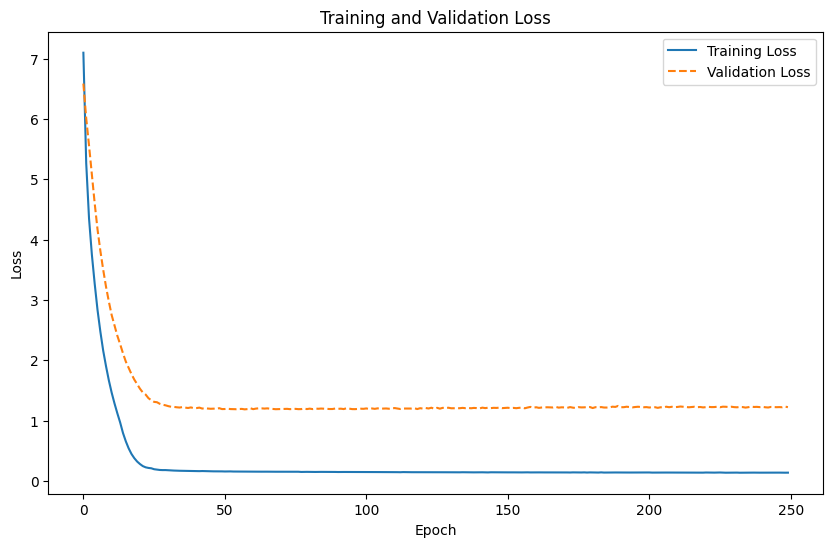

In [15]:
# Plots a linegraph for training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss_history, label='Training Loss')
plt.plot(validation_loss_history, label='Validation Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#### Result Comparison <a id='sub_section_4_6_1'></a>

Throughout the development period of this project, numerous different model configurations were experimented with. Below are some examples of results the model produced for varying hyperparameter values. The graphs for each of the results are displayed below the table.

<u>**Note**:</u> Train and Val loss values are their respective averages over the last few epochs of the training cycle.

<center><b>Table of Hyperparameter Values (and results)<b></center>

| SNo. | Epochs   | Learning Rate | Weight Decay | Batch Size (Train-Val-Test)| Embedding Layers | Train Loss | Val Loss | Test Loss |
|:-----|:--------:|:-------------:|:------------:|:--------------------------:|:----------------:|:----------:|:---------:|:---------:|
|<b>1</b>     |  50      |  0.01         |  1e-5        | 128-64-256                 | 40           |0.210       |1.357      | 1.307      |
|<b>2</b>     |  100      |  0.01         |  1e-7       | 64-64-64                   | 20           |0.228       |1.732      |1.753      |
|<b>3</b>     |  100     |  0.05         |  1e-5        | 256-64-256                 | 60           |3.909       |4.341       |4.21       |
|<b>4</b>     |  750     |  0.01         |  1e-6        | 512-256-256                | 60           | 0.253      |1.401      |1.465      |
|<b>5</b>     |  250     |  0.001        |  1e-5        | 128-128-128                | 60           | 0.026      |1.356      |1.381      |
|<b>6</b>     |  500     |  0.005        |  1e-5        | 128-128-128                | 80           | 0.135      |1.215      |1.296      |
|<b>7</b>    |  <b>250</b>     |  <b>0.005</b>        |  <b>1e-5</b>        | <b>128-128-128</b>                | <b>80</b>           | <b>0.138</b>      |<b>1.225</b>      | <b>1.216</b>      |   
|<b>8</b>     |  150     |  0.005        |  1e-5        | 128-128-128                | 80           | 0.143      |1.246      |1.234      |  

<center>The configuration in <b>row 7</b> is what has been selected for this project (Graph already displayed above)</center>

<center><img src="g_1.jpg" style="width:620px;height:400px;"><br>
<b><em>Graph 1</em></center></b><br><br>
    
<center><img src="g_2.jpg"style="width:620px;height:400px;"><br>
<b><em>Graph 2</em></center></b><br><br>

<center><img src="g_3.jpg" style="width:620px;height:400px;"><br>
<b><em>Graph 3</em></center></b><br><br>

<center><img src="g_4.jpg" style="width:620px;height:400px;"><br>
<b><em>Graph 4</em></center></b><br><br>

<center><img src="g_5.jpg" style="width:620px;height:400px;"><br>
<b><em>Graph 5</em></center></b><br><br>

<center><img src="g_6.jpg" style="width:620px;height:400px;"><br>
<b><em>Graph 6</em></center></b><br><br>

<center><img src="g_8.jpg" style="width:620px;height:400px;"><br>
<b><em>Graph 8</em></center></b><br><br>

## Tutorials on other Movie Recommender Systems <a id="chapter5"></a>

#### How to Build a Movie Recommendation System Based on Collaborative Filtering *(FreeCodeCamp, 2023)*

This tutorial explains the process of building a movie recommendation system using collaborative filtering. It covers the basics of recommendation systems, and all the stages of development of the pipeline (Data processing, model training, obtaining recommendations). 

K-nearest neighbors is the algorithm used for collaborative filtering in this tutorial. Cosine similarity is also utiized to carry out measurements on similaritiies.

#### Movie Recommender-Matrix Factorization Based *(Emine C, 2022)*
This tutorial uses Matrix Factorization which is a class of collaborative filtering algorithms. The model in use is SVD (Single Value Decomposition) which is a well-established matrix factorization technique used in recommendation systems

Both these tutorials employ methods that have their advantages and disadvantages compared to the methods selected in this tutorial. Some of them are listed below.

#### <u>Advantages</u>
- Unlike matrix factorization models, which require training to learn latent factors, cosine similarity functions are based directly on existing user-item interaction data. This implies that a dedicated model training phase is not required, which simplifies the implementation of the model *(Pandit, 2023)*.
- Cosine similarity is extremely straightforward to implement and interpret which makes it a popular choice for user-based collaborative filtering.
- SVD models, when dimensionally reduced, pose a much lesser risk of overfitting compared to more complex models that may require regularization.

#### <u>Disadvantages</u>
- The neural network-based architecture employed in the code (of this tutorial) allows for a greater degree of flexibility in the model architecture. For example, adding new layers or non-linear activation functions is easily possible.
- Neural network models generalize better to unseen data rather than relying on explicit matrix factorization which might overfit to observed data.
- Models like SVD can be computationally intensive and less scalable for larger matrices. However, neural network-based approaches can leverage advancements in GPU computing to increase the efficiency of the training process.

## References <a id="chapter6"></a>


<b>Valohai (n.d.). What is a Machine Learning Pipeline?</b> [online] Available at: https://valohai.com/machine-learning-pipeline/.

<b>PyTorch (2019). PyTorch documentation — PyTorch master documentation.</b> [online] Pytorch.org. Available at: https://pytorch.org/docs/stable/index.html.

<b>scikit-learn (2019). scikit-learn: machine learning in Python.</b> [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/.

<b>Matplotlib (2023). Matplotlib: Python plotting — Matplotlib 3.1.1 documentation.</b> [online] Matplotlib.org. Available at: https://matplotlib.org/.

<b>Xenonstack (2020). Data Preparation Process, Preprocessing and Data Wrangling.</b> [online] Medium. Available at: https://xenonstack.medium.com/data-preparation-process-preprocessing-and-data-wrangling-6c4068f2fcd1.

<b>Kaggle. (n.d.). MovieLens 20M Dataset.</b> [online] Available at: https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset.

<b>Chen, D. (2020). Recommendation System — Matrix Factorization.</b> [online] Medium. Available at: https://towardsdatascience.com/recommendation-system-matrix-factorization-d61978660b4b.

<b>Saturncloud.io (2023). Custom Loss Function in PyTorch: A Guide | Saturn Cloud Blog.</b> [online] Available at: https://saturncloud.io/blog/custom-loss-function-in-pytorch-a-comprehensive-guide/

<b>Amazon Web Services, Inc. (n.d.). What is Hyperparameter Tuning? - Hyperparameter Tuning Methods Explained - AWS.</b> [online] Available at: https://aws.amazon.com/what-is/hyperparameter-tuning/#:~:text=computationally%20intensive%20process.-.

<b>UNext. (2022). What is Epoch in Machine Learning?| UNext.</b> [online] Available at: https://u-next.com/blogs/machine-learning/epoch-in-machine-learning/#:~:text=An%20epoch%20in%20machine%20learning.

<b>Perlato, A. (n.d.). The Learning Rate - Andrea Perlato.</b> [online] Available at: https://www.andreaperlato.com/theorypost/the-learning-rate/#:~:text=The%20range%20of%20values%20to.

<b>Leaky.ai. (n.d.). PyTorch Dataloader Overview (batch_size, shuffle, num_workers).</b> [online] Available at: https://www.leaky.ai/dataloader

<b>sabrepc. (n.d.). Epochs, Batch Size, Iterations - How they are Important.</b> [online] Available at: https://www.sabrepc.com/blog/Deep-Learning-and-AI/Epochs-Batch-Size-Iterations.

<b>Yang, S. (2020). Deep learning basics — weight decay.</b> [online] Analytics Vidhya. Available at: https://medium.com/analytics-vidhya/deep-learning-basics-weight-decay-3c68eb4344e9.

<b>freeCodeCamp.org. (2023). How to Build a Movie Recommendation System Based on Collaborative Filtering.</b> [online] Available at: https://www.freecodecamp.org/news/how-to-build-a-movie-recommendation-system-based-on-collaborative-filtering/.

<b>Emine, C. (2022). Movie Recommender-Matrix Factorization Based.</b> [online] Available at: https://www.kaggle.com/code/eminecerit/movie-recommender-matrix-factorization-based.

<b>Pandit, D. (2023). Recommender System : User Collaborative filtering.</b> [online] Medium. Available at: https://medium.com/@deepapandithu/recommender-system-user-collaborative-filtering-37613f0c6a9#:~:text=Cosine%20similarity%20is%20a%20popular